In [ ]:
from pathlib import Path

import librosa
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import soundfile as sf
from IPython.display import Audio, display

SAMPLE_RATE = 16000  # 16kHz is standard for speech recognition ML
CHANNELS = 1  # Mono (don't need left/right)
DATA_DIR = Path("../data/sample_audio")
DATA_DIR.mkdir(parents=True, exist_ok=True)

print("Audio setup complete!")
print(f"Sample rate: {SAMPLE_RATE} Hz")
print(f"Channels: {CHANNELS}")

Audio setup complete!
Sample rate: 16000 Hz
Channels: 1


In [2]:
def record_audio(duration=5, filename=None):
    """
    Record audio from microphone
    
    Args:
        duration: Recording duration in seconds
        filename: Optional filename to save (without extension)
    
    Returns:
        audio_data: numpy array of recorded audio
        sample_rate: sample rate used
    """
    print(f"Recording for {duration} seconds...")
    print("Start speaking now!")
    
    # Record audio
    audio_data = sd.rec(
        int(duration * SAMPLE_RATE),
        samplerate=SAMPLE_RATE,
        channels=CHANNELS,
        dtype='float32'
    )
    sd.wait()  # Wait until recording is finished
    
    print("Recording complete!")
    
    # Save if filename provided
    if filename:
        filepath = DATA_DIR / f"{filename}.wav"
        sf.write(filepath, audio_data, SAMPLE_RATE)
        print(f"Saved to: {filepath}")
    
    return audio_data, SAMPLE_RATE


In [3]:
audio, sr = record_audio(duration=3, filename="ni_hao_01")

Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/ni_hao_01.wav


In [4]:
def play_audio(audio_data=None, filename=None, sample_rate=SAMPLE_RATE):
    """
    Play audio either from array or file
    
    Args:
        audio_data: numpy array of audio (optional)
        filename: filename to load and play (optional)
        sample_rate: sample rate for playback
    """
    if filename:
        filepath = DATA_DIR / f"{filename}.wav"
        audio_data, sample_rate = sf.read(filepath)
        print(f"Playing: {filename}.wav")
    
    if audio_data is not None:
        # Display audio player widget
        return Audio(audio_data.T, rate=sample_rate)
    else:
        print("No audio data provided!")
        return None


In [5]:
play_audio(filename="ni_hao_01")

Playing: ni_hao_01.wav


In [24]:
def visualize_waveform(audio_data=None, filename=None, sample_rate=SAMPLE_RATE):
    """
    Visualize audio waveform with aligned x-axes (no colorbar)
    """
    if filename:
        filepath = DATA_DIR / f"{filename}.wav"
        audio_data, sample_rate = sf.read(filepath)
    
    if audio_data is None:
        print("No audio data provided!")
        return
    
    # Flatten if stereo
    if len(audio_data.shape) > 1:
        audio_data = audio_data.flatten()
    
    # Create figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(14, 8))
    
    # Time-domain waveform
    time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))
    axes[0].plot(time, audio_data, linewidth=0.5)
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude')
    axes[0].set_title('Waveform')
    axes[0].grid(True, alpha=0.3)
    
    # Spectrogram (no colorbar)
    D = librosa.stft(audio_data, hop_length=512)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    librosa.display.specshow(
        S_db,
        sr=sample_rate,
        hop_length=512,
        x_axis='time',
        y_axis='hz',
        ax=axes[1]
    )
    axes[1].set_title('Spectrogram')
    
    plt.tight_layout()
    plt.show()
    
    # Print basic stats
    duration = len(audio_data) / sample_rate
    print(f"Duration: {duration:.2f} seconds")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Max amplitude: {np.max(np.abs(audio_data)):.4f}")

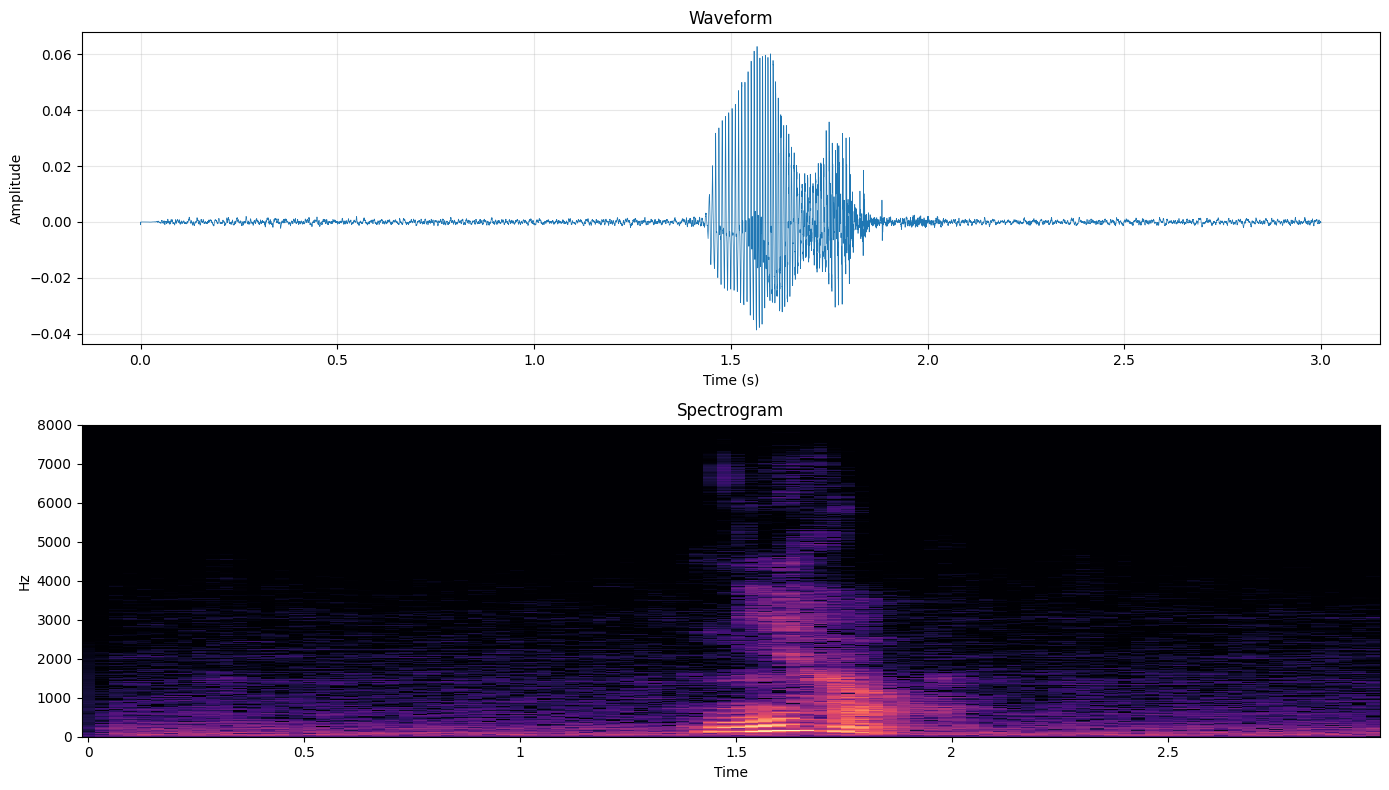

Duration: 3.00 seconds
Sample rate: 16000 Hz
Max amplitude: 0.0628


In [25]:
visualize_waveform(filename="ni_hao_01")

# Record some audio to help future development

First remove the test file we just created.

In [1]:
!rm ../data/sample_audio/ni_hao_01.wav

Record a bunch of stuff.

In [8]:
def record_phrase_batch():
    """
    Helper function to record multiple phrases with prompts
    """
    phrases = [
        ("ni_hao", "你好 (nǐ hǎo)"),
        ("xie_xie", "谢谢 (xiè xiè)"),
        # Different tones
        ("ma_ma", "妈妈 (mā ma)"),
        ("ma_horse", "马 (mǎ)"),
        ("ma_scold", "骂 (mà)"),
        # Common Phrases
        ("wo_zai_xue_zhong_wen", "我在学中文 (wǒ zài xué zhōng wén)"),
        ("jin_tian_tian_qi_hen_hao", "今天天气很好 (jīn tiān tiān qì hěn hǎo)"),
        # Challenging Sounds
        ("zhi_dao", "知道 (zhī dào)"),
        ("chi_fan", "吃饭 (chī fàn)"),
    ]
    
    print("Recording session starting!")
    print("You'll have 3 seconds to say each phrase.\n")
    input("Press Enter to begin...")
    
    for filename, phrase_text in phrases:
        print(f"\n--- Say: {phrase_text} ---")
        input("Press Enter when ready...")
        audio, sr = record_audio(duration=3, filename=filename)
        print("✓ Recorded\n")
    
    print("All recordings complete!")

In [10]:
record_phrase_batch()

Recording session starting!
You'll have 3 seconds to say each phrase.


--- Say: 你好 (nǐ hǎo) ---
Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/ni_hao.wav
✓ Recorded


--- Say: 谢谢 (xiè xiè) ---
Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/xie_xie.wav
✓ Recorded


--- Say: 妈妈 (mā ma) ---
Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/ma_ma.wav
✓ Recorded


--- Say: 马 (mǎ) ---
Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/ma_horse.wav
✓ Recorded


--- Say: 骂 (mà) ---
Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/ma_scold.wav
✓ Recorded


--- Say: 我在学中文 (wǒ zài xué zhōng wén) ---
Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/wo_zai_xue_zhong_wen.wav
✓ Recorded


--- Say: 今天天气很好 (jīn 

# Quick visualisation

Quick test recording:
Say '你好' (nǐ hǎo) when recording starts -- Do this incorrectly to test the model

Recording for 3 seconds...
Start speaking now!
Recording complete!
Saved to: ../data/sample_audio/ni_hao_incorrect.wav


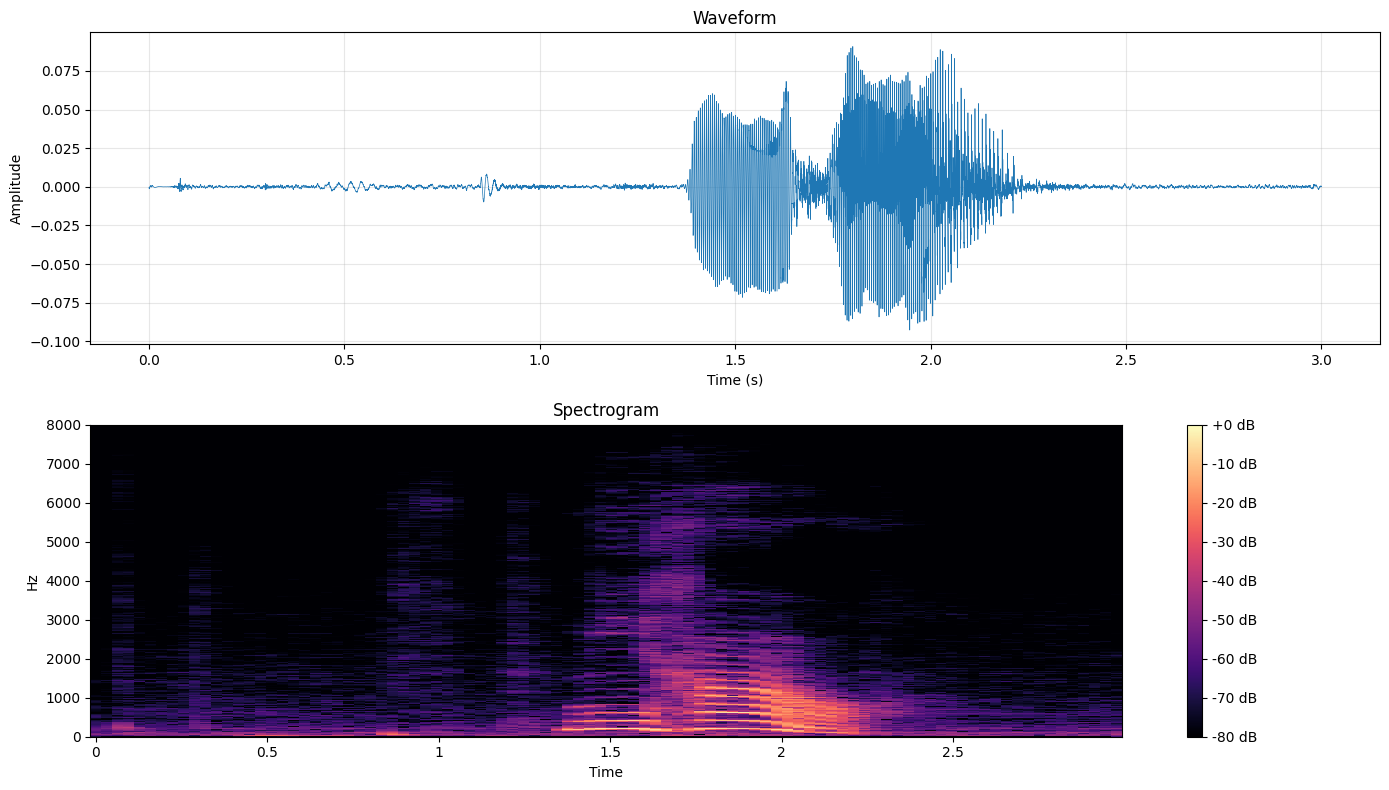

Duration: 3.00 seconds
Sample rate: 16000 Hz
Max amplitude: 0.0927


In [14]:
print("Quick test recording:")
print("Say '你好' (nǐ hǎo) when recording starts -- Do this incorrectly to test the model\n")

audio, sr = record_audio(duration=3, filename="ni_hao_incorrect")

# Playback
display(play_audio(audio_data=audio))

# Visualize
visualize_waveform(audio_data=audio)

# List recordings

In [26]:
def list_recordings():
    """List all .wav files in the data directory"""
    wav_files = sorted(DATA_DIR.glob("*.wav"))
    
    if not wav_files:
        print("No recordings found yet!")
        return []
    
    print(f"Found {len(wav_files)} recordings:\n")
    for i, filepath in enumerate(wav_files, 1):
        # Get file info
        info = sf.info(filepath)
        duration = info.duration
        print(f"{i}. {filepath.name} ({duration:.2f}s)")
    
    return wav_files

# List all recordings
recordings = list_recordings()

Found 12 recordings:

1. chi_fan.wav (3.00s)
2. jin_tian_tian_qi_hen_hao.wav (3.00s)
3. ma_horse.wav (3.00s)
4. ma_ma.wav (3.00s)
5. ma_scold.wav (3.00s)
6. ni_hao.wav (3.00s)
7. ni_hao_01.wav (3.00s)
8. ni_hao_incorrect.wav (3.00s)
9. test_ni_hao.wav (3.00s)
10. wo_zai_xue_zhong_wen.wav (3.00s)
11. xie_xie.wav (3.00s)
12. zhi_dao.wav (3.00s)
